In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [28]:
#
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


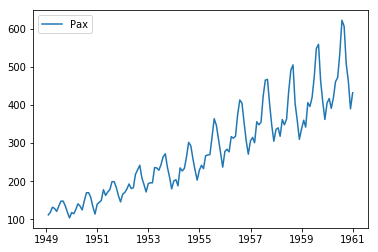

In [6]:
air=pd.read_csv('AirPax.csv')
date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
air['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month']) 
plt.plot(air.TimeIndex, air.Pax)
plt.legend(loc='best')
pyplot.show()

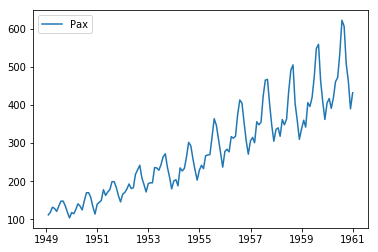

In [21]:
AirPax = pd.read_csv('AirPax.csv')
AirPax.head()
date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
date_rng
AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
AirPax.head()
plt.plot(AirPax.TimeIndex, AirPax.Pax)
plt.legend(loc='best')
pyplot.show()

In [22]:
trainPax=AirPax[0:119] 
testPax=AirPax[120:]
trainPax.head()

,Year,Month,Pax,TimeIndex
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [11]:
import statsmodels.api as sm

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

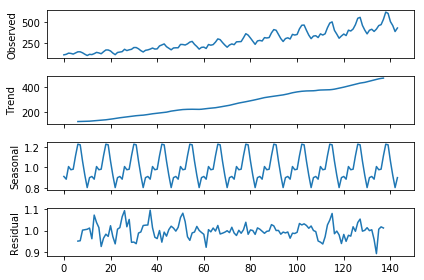

In [12]:
decompAirPax = sm.tsa.seasonal_decompose(AirPax.Pax, model="multiplicative", freq=12)
decompAirPax.plot()
plt.show()

In [13]:
seasonal = decompAirPax.seasonal
seasonal.head(24)

0     0.910230
1     0.883625
2     1.007366
3     0.975906
4     0.981378
5     1.112776
6     1.226556
7     1.219911
8     1.060492
9     0.921757
10    0.801178
11    0.898824
12    0.910230
13    0.883625
14    1.007366
15    0.975906
16    0.981378
17    1.112776
18    1.226556
19    1.219911
20    1.060492
21    0.921757
22    0.801178
23    0.898824
Name: Pax, dtype: float64

In [38]:
model = Holt(np.asarray(air['Pax']))
model81_fit = model.fit(smoothing_level = 0.2,smoothing_slope = 0.2,smoothing_seasonal = 0.8,optimized=False)

TypeError: fit() got an unexpected keyword argument 'smoothing_seasonal'

In [24]:
model1_fit=ExponentialSmoothing(np.asarray(trainPax['Pax']), seasonal_periods=12 ,seasonal='add').fit(optimized=True)

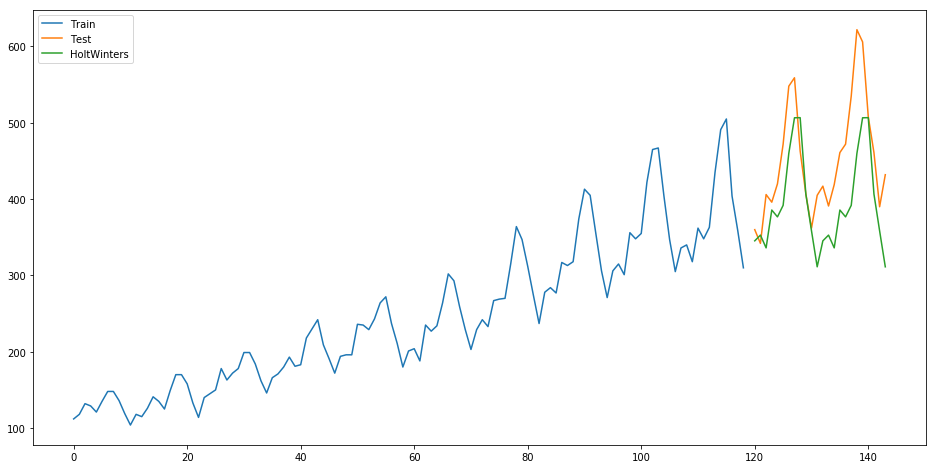

In [25]:
fcst_HoltW = testPax.copy()
fcst_HoltW['HoltW'] = model1_fit.forecast(len(testPax['Pax']))
plt.figure(figsize=(16,8))
plt.plot(trainPax['Pax'], label='Train')
plt.plot(testPax['Pax'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters')
plt.legend(loc='best')

In [40]:
model2opt_fit = ExponentialSmoothing(np.asarray(trainPax['Pax']),  seasonal_periods=12, trend='add',seasonal='mul',smoothing_level = 0.2,smoothing_slope = 0.2,smoothing_seasonal = 0.8).fit(optimized=False)

TypeError: __init__() got an unexpected keyword argument 'smoothing_level'

In [30]:
fcst_Holt['Opt'] = modelopt_fit.forecast(len(testPax['Pax']))

NameError: name 'modelopt_fit' is not defined

In [41]:
fcst_Holtpt = train.copy()

NameError: name 'train' is not defined

In [29]:
mean_absolute_percentage_error(testPax['Pax'],fcst_HoltW['HoltWM'])

KeyError: 'HoltWM'

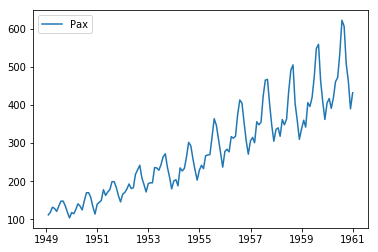

In [42]:
AirPax = pd.read_csv('AirPax.csv')
AirPax.head()
date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
date_rng
AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
AirPax.head()
plt.plot(AirPax.TimeIndex, AirPax.Pax)
plt.legend(loc='best')
pyplot.show()

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(AirPax, AirPax.Pax, test_size=0.2)

In [45]:
X_train

,Year,Month,Pax,TimeIndex
77,1955,Jun,315,1955-06-30
70,1954,Nov,203,1954-11-30
128,1959,Sep,463,1959-09-30
130,1959,Nov,362,1959-11-30
47,1952,Dec,194,1952-12-31
94,1956,Nov,271,1956-11-30
73,1955,Feb,233,1955-02-28
125,1959,Jun,472,1959-06-30
90,1956,Jul,413,1956-07-31
27,1951,Apr,163,1951-04-30
